## Name: Deep Kothari
#Data Science & Business Analytics Task 3:
#Exploratory Data Analysis on Superstore Dataset

In [78]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Uploading the dataset using pandas
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [80]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [81]:
data.duplicated().sum()

17

In [82]:
data.drop_duplicates(keep="first",inplace=True)
data.shape

(9977, 13)

In [83]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [84]:
correlation = data.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


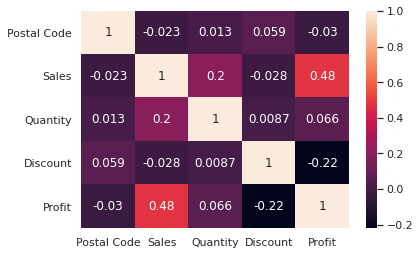

In [85]:
sns.heatmap(correlation,annot=True)

In [86]:
data_con=data.select_dtypes(include=[np.number])

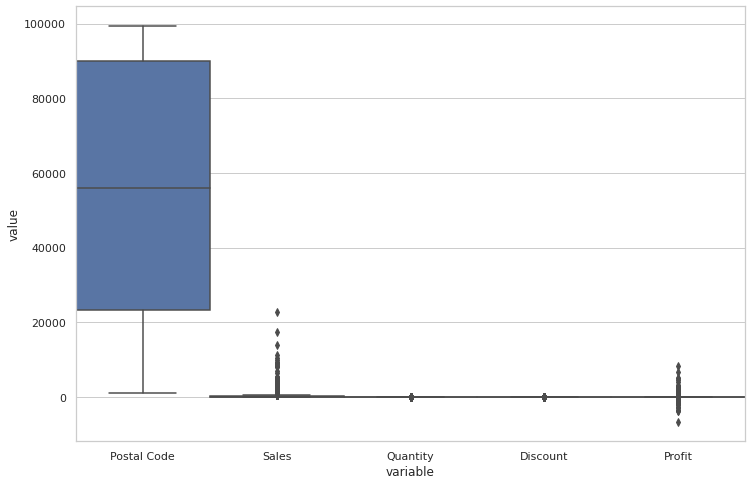

In [87]:
#BoxPlot

plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data_con), width=1)

plt.show()

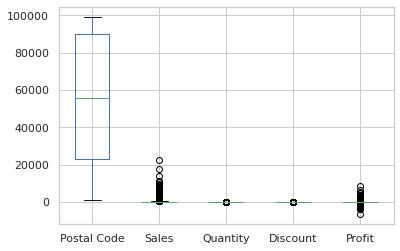

In [88]:
data_con.plot(kind='box')

In [89]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [90]:
remove_outlier(data,k=3.33)

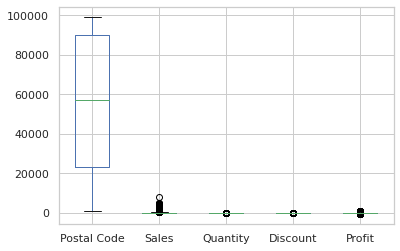

In [91]:
ds_con=ds.select_dtypes(include=[np.number])
ds_con.plot(kind='box')

In [92]:
ds.shape

(9889, 13)

In [93]:
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [94]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9889 non-null   object 
 1   Segment       9889 non-null   object 
 2   Country       9889 non-null   object 
 3   City          9889 non-null   object 
 4   State         9889 non-null   object 
 5   Postal Code   9889 non-null   int64  
 6   Region        9889 non-null   object 
 7   Category      9889 non-null   object 
 8   Sub-Category  9889 non-null   object 
 9   Sales         9889 non-null   float64
 10  Quantity      9889 non-null   int64  
 11  Discount      9889 non-null   float64
 12  Profit        9889 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [95]:
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("-----------------------------------------------------------")

Number of unique entries in Ship Mode are 4
-----------------------------------------------------------
Number of unique entries in Segment are 3
-----------------------------------------------------------
Number of unique entries in Country are 1
-----------------------------------------------------------
Number of unique entries in City are 531
-----------------------------------------------------------
Number of unique entries in State are 49
-----------------------------------------------------------
Number of unique entries in Region are 4
-----------------------------------------------------------
Number of unique entries in Category are 3
-----------------------------------------------------------
Number of unique entries in Sub-Category are 17
-----------------------------------------------------------


In [98]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [99]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

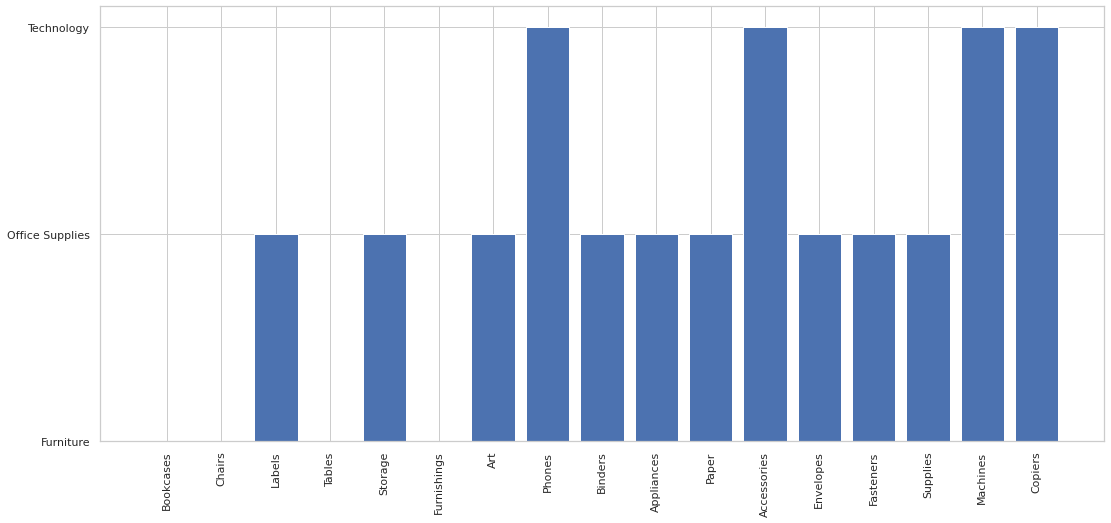

In [100]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category', 'Category', data=data)
plt.xticks(rotation=90)

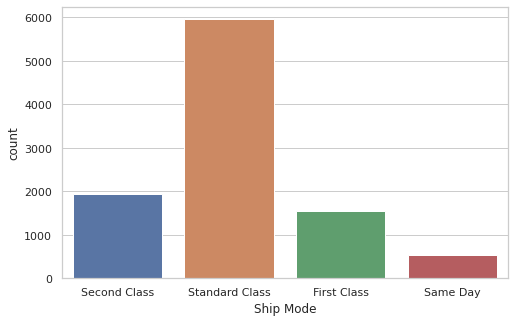

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Ship Mode'])

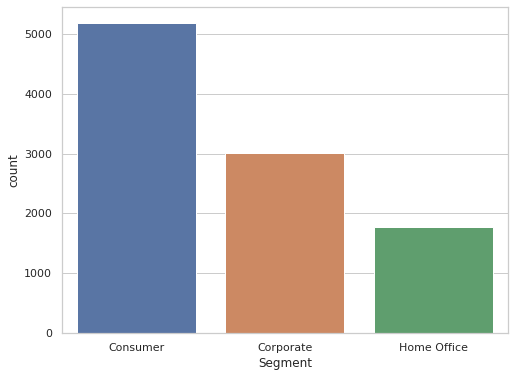

In [102]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Segment'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


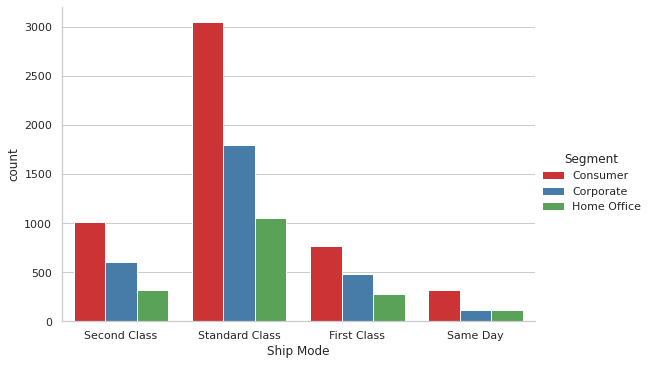

In [103]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

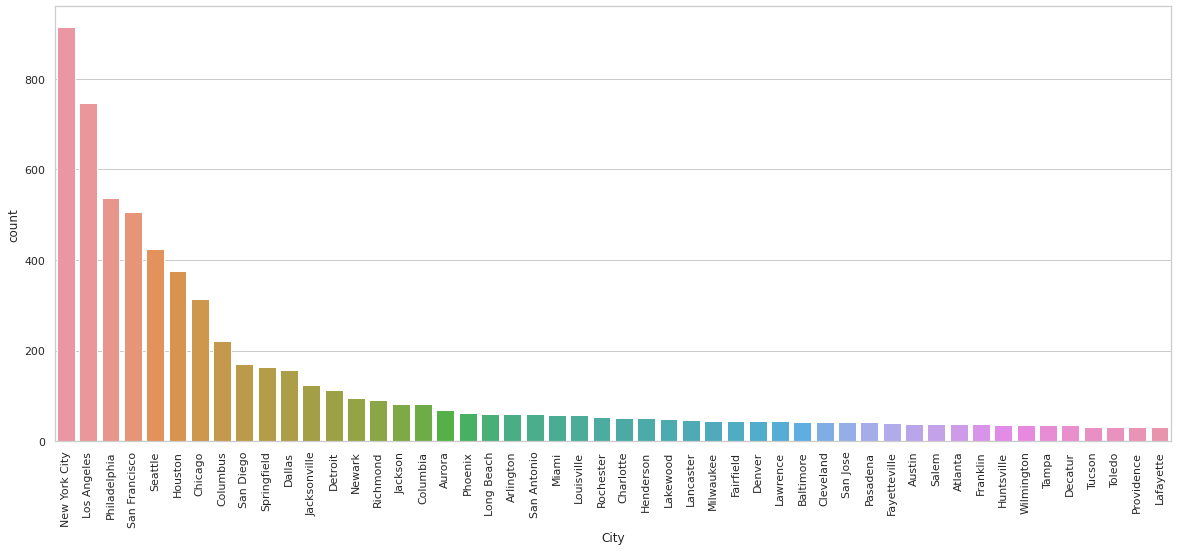

In [104]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

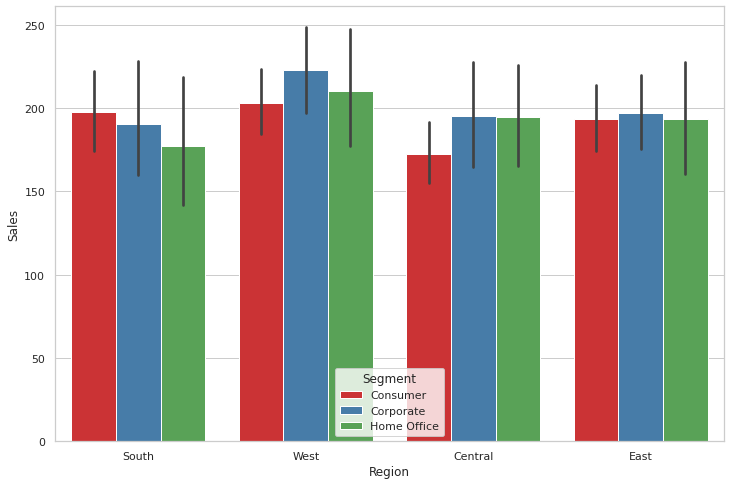

In [105]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

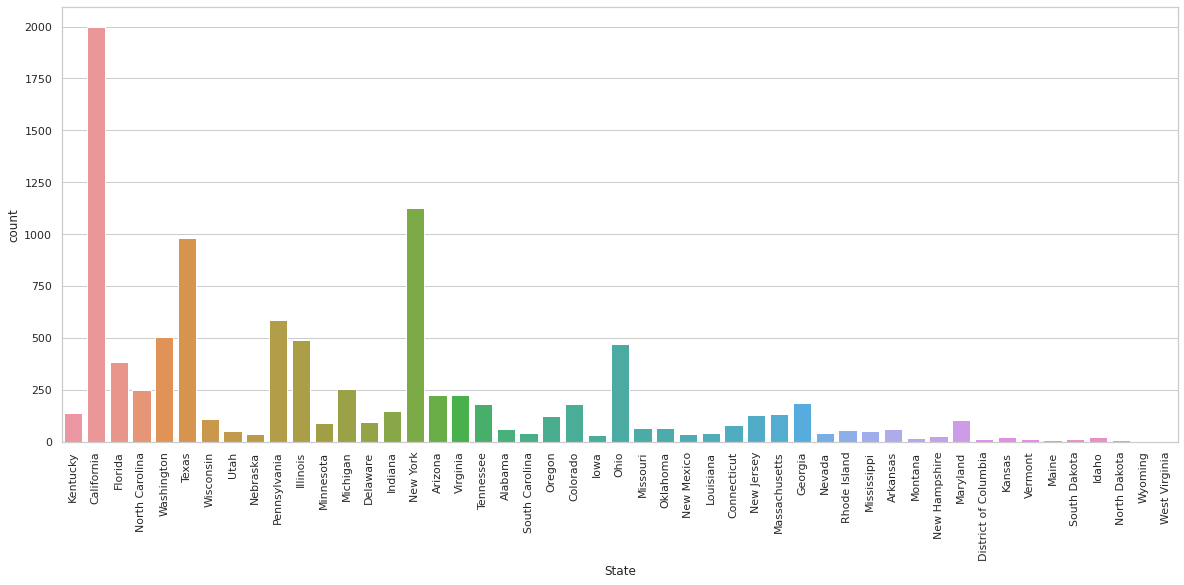

In [106]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

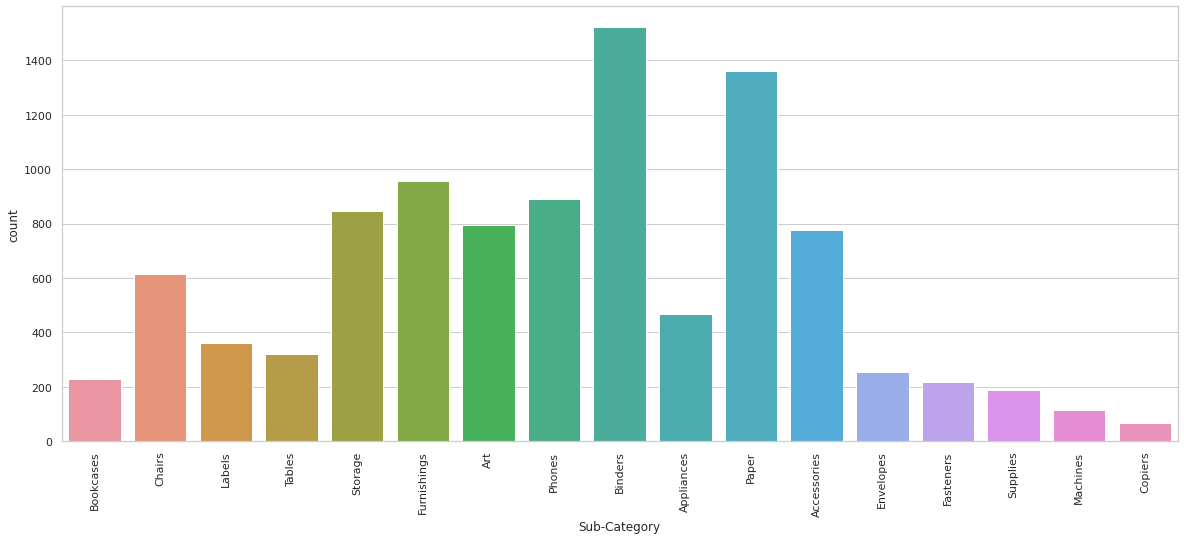

In [108]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

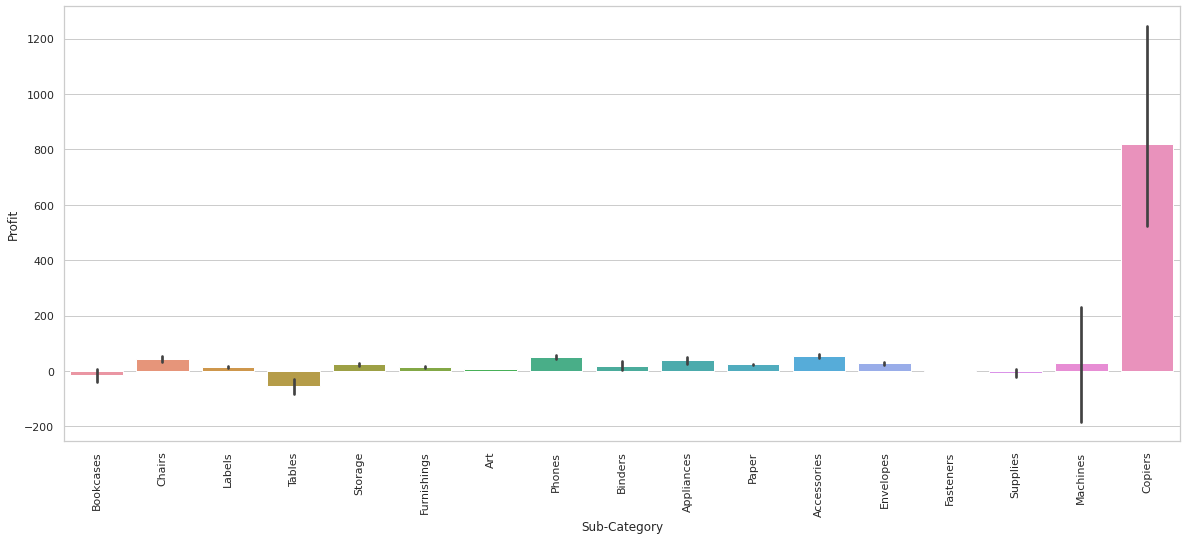

In [109]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])
plt.xticks(rotation=90)

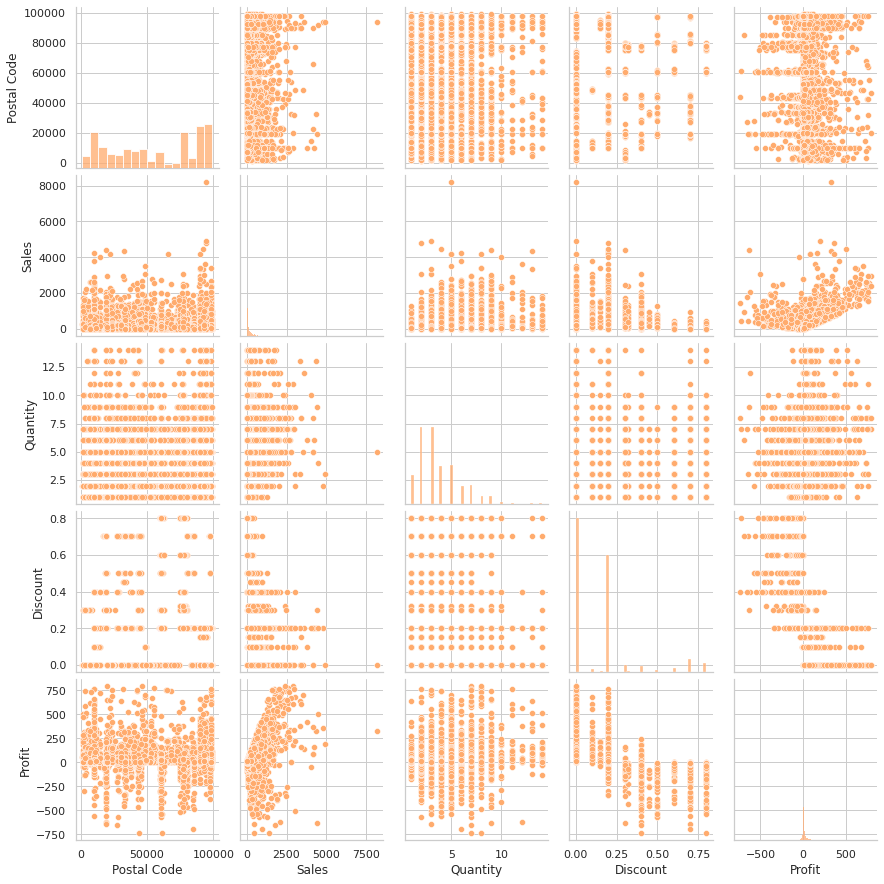

In [112]:
sns.set_palette('copper_r')
sns.pairplot(ds)

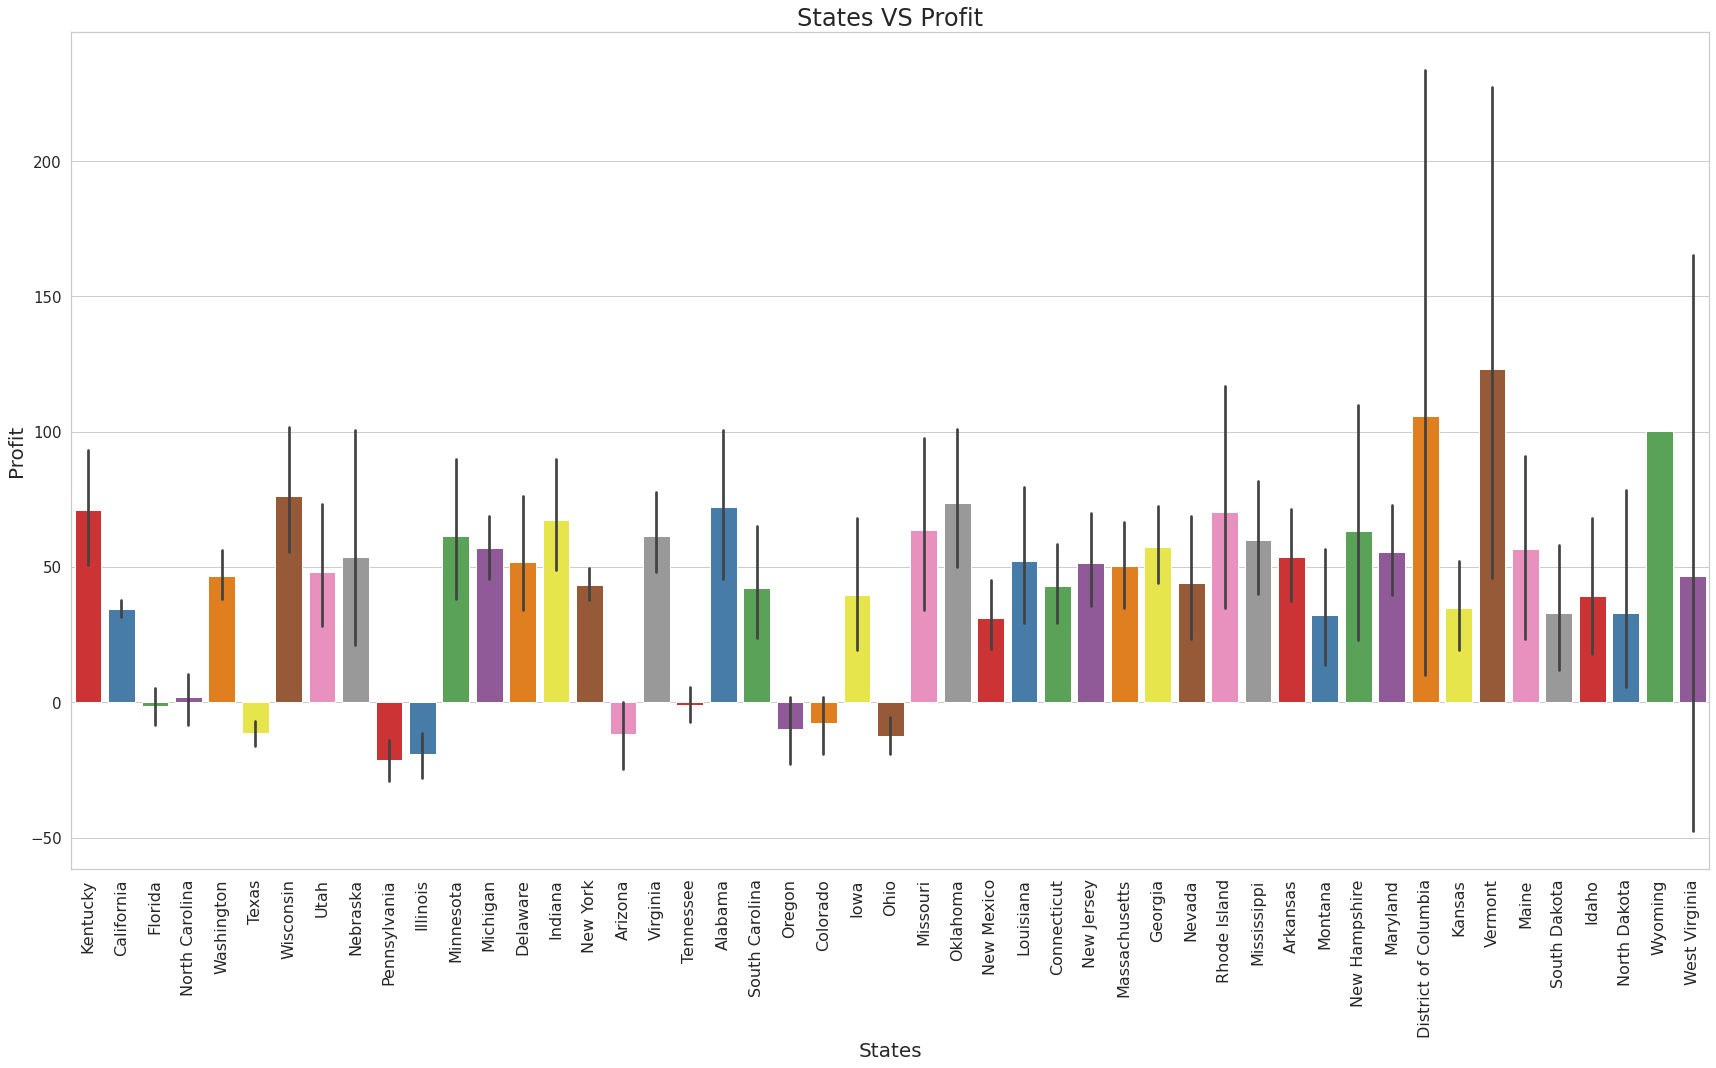

In [114]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

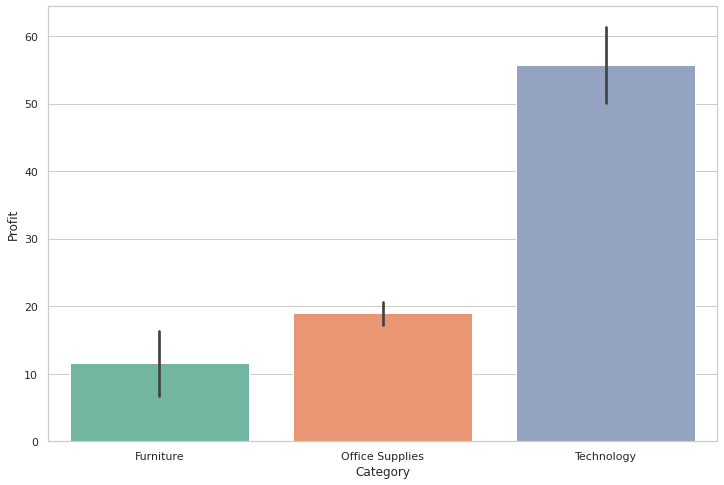

In [115]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Set2")

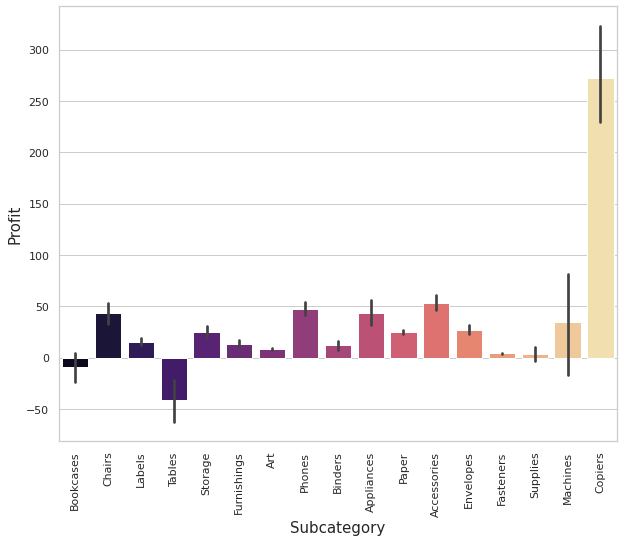

In [116]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [117]:
ds_tech=ds[(ds['Category']=="Technology")]

Text(0, 0.5, 'Sales')

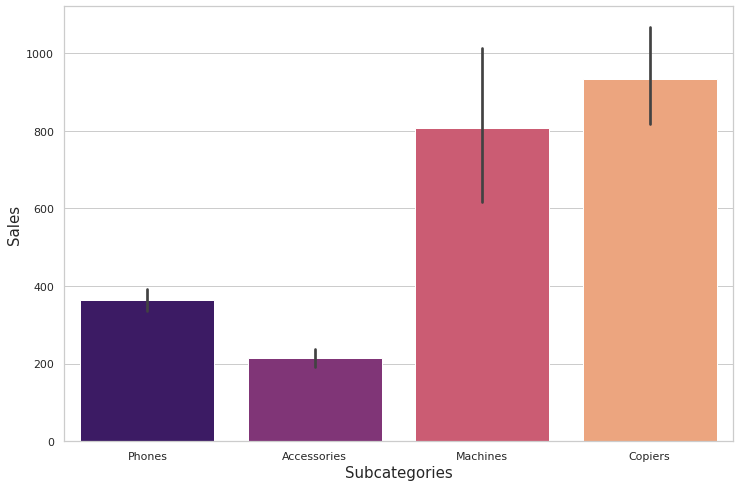

In [118]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

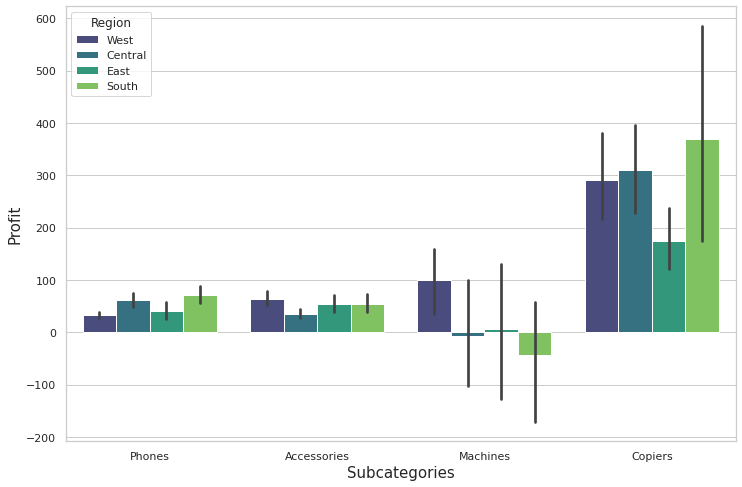

In [119]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

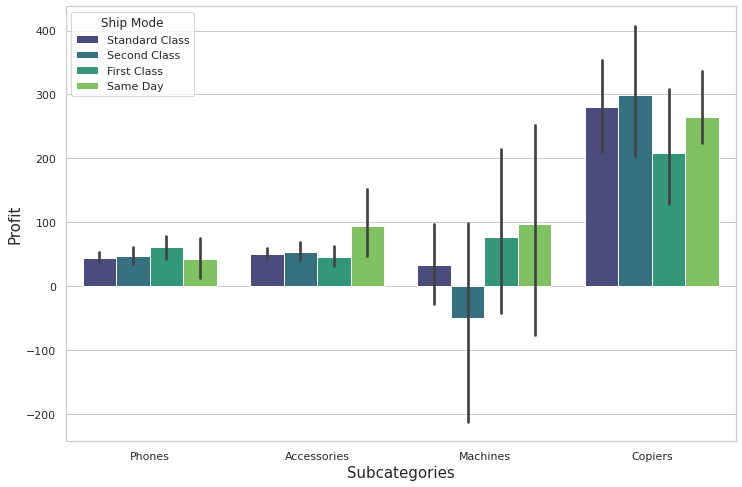

In [120]:

plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Ship Mode", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)